# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

Solution for 1.

MSE = $\frac{1}{n} \sum_{i=1}^n (y_i - \hat{Y_i})^2$
Calculate the square difference between true and predicted values for each pair: 
$1.(500-450)^2 = 50^2 = 2500$
$2. (300-350)^2 = (-50)^2 = 2500$
$3. (800-780)^2 = 20^2 = 400$
$4. (400-420)^2 = (-20)^2 = 400$
$5. (6000-910)^2 = 5090^2 = 25908100$

Then sum all differences: $(2500+2500+400+400+25908100=25913900)$

Since n=5 the MSE will be:

MSE $= \frac{25913900}{5} = 5182780$

Solution for 2.

The MSE quantifies the average square difference between true values and predicted values.

Solution for 3.

1. Sensitive to large errors;
2. Hard to interpret

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

Solution for 4:



MSE = $5182780$

RMSE $= \sqrt{MSE}$

RMSE = $\sqrt{5182780}$ = $2276.6$


## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

Solution: 
MSE = $\mathbb{E}[(\hat{Y} - Y)^2] ]$

Substitute the identity into the MSE: 

MSE = $\mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}] + \mathbb{E}[\hat{Y}] - Y)^2] ]$

Use formula $(a+b)^2=a^2+2ab+b^2$
$(\hat{Y} - \mathbb{E}[\hat{Y}] + \mathbb{E}[\hat{Y}] - Y)^2 = (\hat{Y} - \mathbb{E}[\hat{Y}])^2 + 2(\hat{Y} -\mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - Y) + (\mathbb{E}\hat{Y}] - Y)^2$

Take the expectation of both sides: $[ \mathbb{E}[(\hat{Y} - Y)^2] = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2] + \mathbb{E}[(\mathbb{E}[\hat{Y}] - Y)^2] + 2 \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])(\mathbb{E}[\hat{Y}] - Y)] ]$


# Coding exercise

In [2]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer

from sklearn.ensemble import GradientBoostingRegressor

# Import the other necessary library here
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# import the dataset
#df = pd.read_csv("C:\\Users\\Darya\\Desktop\\№7 Lecture support materials, lectures, seminars and labs\\Seminars\\Machine learning\\Sis\\cars.csv")
df = pd.read_csv("C:\\Users\\Darya\\Desktop\\№7 Lecture support materials, lectures, seminars and labs\\Seminars\\Machine learning\\Sis\\cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [5]:
# Selecting the features and target variable
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = df['selling_price']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Making predictions
y_pred = gbr.predict(X_test)

# Calculating metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R^2: {r2}')

# Plotting the results
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Selling Prices')
plt.show()

NameError: name 'mean_absolute_error' is not defined

### 1. Analyse your dataset. How many features and columns do we have ?

In [6]:
# Display the number of features and columns
num_features = len(df.columns)
num_rows = len(df)
print(f"The dataset contains {num_rows} rows and {num_features} columns.")

# Display the first few rows of the dataset to understand its structure
print(df.head())

The dataset contains 8128 rows and 12 columns.
                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0  
1  Individual       Manual  Second Owner    21.14  1498.0     103.52    5.0  
2  Individual       Manual   Third Owner    17.70  1497.0      78.00    5.0  
3  Individual       Manual   First Owner    23.00  1396.0      90.00    5.0  
4  Individual       Manual   First Owner    16.10  1298.0      88.20    5.0  


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [7]:
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# Ordinal variables (typically ordered categories)
# In this case, we assume 'owner' is ordinal (First Owner, Second Owner, etc.)
ordinal_column = 'owner'

# Nominal variables (no intrinsic order)
nominal_columns = ['fuel', 'seller_type', 'transmission']

# Initialize encoders
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Encode ordinal variable
df[ordinal_column] = label_encoder.fit_transform(df[ordinal_column])

# Encode nominal variables using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())

# Display the encodings for the ordinal variable
print(f"Ordinal encoding for '{ordinal_column}':")
for i, item in enumerate(label_encoder.classes_):
    print(f"{item}: {i}")

                           name  year  selling_price  km_driven  owner  \
0        Maruti Swift Dzire VDI  2014         450000     145500      0   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000      2   
2      Honda City 2017-2020 EXi  2006         158000     140000      4   
3     Hyundai i20 Sportz Diesel  2010         225000     127000      0   
4        Maruti Swift VXI BSIII  2007         130000     120000      0   

   mileage  engine  max_power  seats  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0    23.40  1248.0      74.00    5.0         True     False        False   
1    21.14  1498.0     103.52    5.0         True     False        False   
2    17.70  1497.0      78.00    5.0        False     False         True   
3    23.00  1396.0      90.00    5.0         True     False        False   
4    16.10  1298.0      88.20    5.0        False     False         True   

   seller_type_Individual  seller_type_Trustmark Dealer  transmission_Manual  
0                  

### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

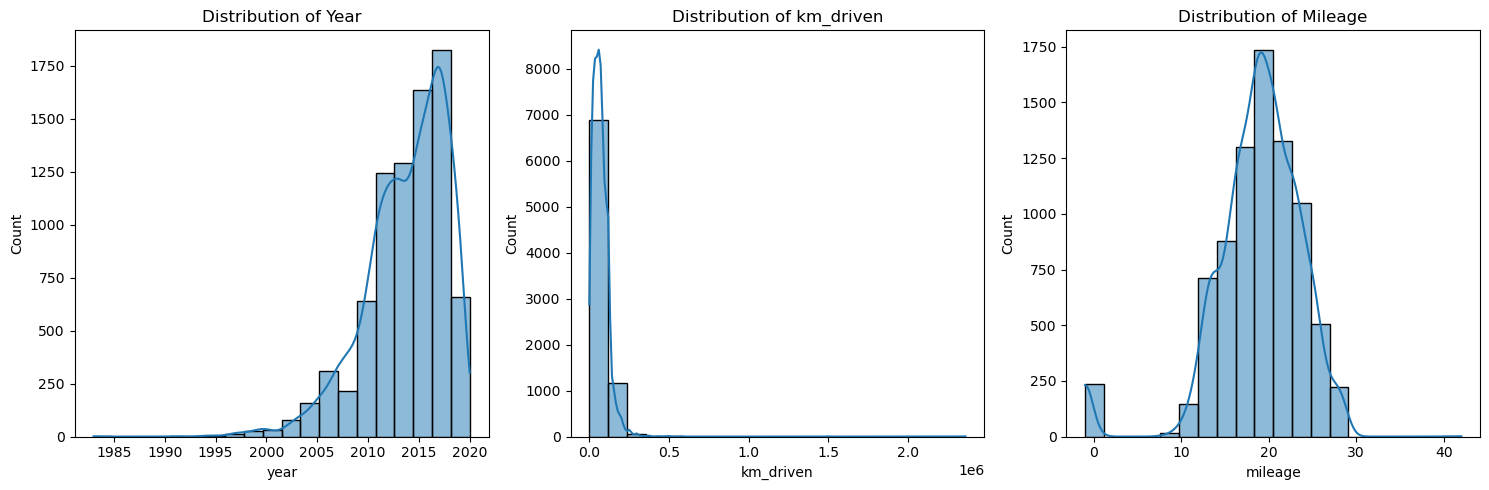

In [8]:
# Plot the distributions of Year, km_driven, and mileage
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['year'], kde=True, bins=20)
plt.title('Distribution of Year')

plt.subplot(1, 3, 2)
sns.histplot(df['km_driven'], kde=True, bins=20)
plt.title('Distribution of km_driven')

plt.subplot(1, 3, 3)
sns.histplot(df['mileage'], kde=True, bins=20)
plt.title('Distribution of Mileage')

plt.tight_layout()
plt.show()

### 4. Scale those three numerical features, use whatever scaler you want

In [9]:
# Select the numerical features to scale
numerical_features = ['year', 'km_driven', 'mileage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows of the scaled dataset
print(df.head())

                           name      year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  0.048464         450000   1.338363  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  0.048464         370000   0.887411  Diesel   
2      Honda City 2017-2020 EXi -1.929775         158000   1.241098  Petrol   
3     Hyundai i20 Sportz Diesel -0.940656         225000   1.011202  Diesel   
4        Maruti Swift VXI BSIII -1.682495         130000   0.887411  Petrol   

  seller_type transmission  owner   mileage  engine  max_power  seats  
0  Individual       Manual      0  0.890224  1248.0      74.00    5.0  
1  Individual       Manual      2  0.452663  1498.0     103.52    5.0  
2  Individual       Manual      4 -0.213361  1497.0      78.00    5.0  
3  Individual       Manual      0  0.812780  1396.0      90.00    5.0  
4  Individual       Manual      0 -0.523139  1298.0      88.20    5.0  


### 5. Select Features and Target Variable
Separate X's to y

In [10]:
# Selecting the features and target variable
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = df['selling_price']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
       year  km_driven   mileage  engine  max_power  seats  fuel_Diesel  \
0  0.048464   1.338363  0.890224  1248.0      74.00    5.0         True   
1  0.048464   0.887411  0.452663  1498.0     103.52    5.0         True   
2 -1.929775   1.241098 -0.213361  1497.0      78.00    5.0        False   
3 -0.940656   1.011202  0.812780  1396.0      90.00    5.0         True   
4 -1.682495   0.887411 -0.523139  1298.0      88.20    5.0        False   

   fuel_LPG  fuel_Petrol  seller_type_Individual  \
0     False        False                    True   
1     False        False                    True   
2     False         True                    True   
3     False        False                    True   
4     False         True                    True   

   seller_type_Trustmark Dealer  transmission_Manual  owner_1  owner_2  \
0                         False                 True    False    False   
1                         False                 True    False     True   


### 6. Plot the distribution of the Target variable 

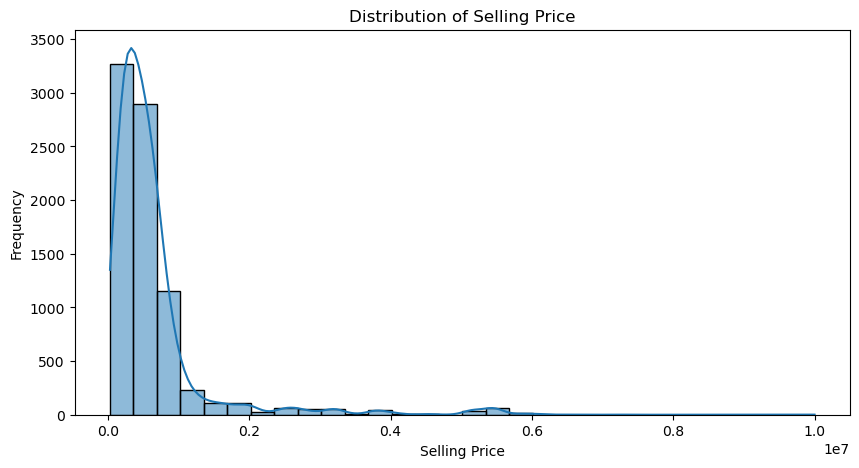

In [11]:
# Plot the distribution of the target variable (selling_price)
plt.figure(figsize=(10, 5))
sns.histplot(df['selling_price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### 7. Split the Data
Split the dataset into training and testing sets. You should then have four dataset, X_train, X_test, y_train and y_test

In [12]:
# Selecting the features and target variable
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = df['selling_price']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())

X_train:
          year  km_driven   mileage  engine  max_power  seats  fuel_Diesel  \
6518  1.284864  -1.189443  1.006391  1199.0      83.81    5.0        False   
6144 -0.198816   0.180036  0.115779  1198.0      86.80    5.0        False   
6381 -0.693376   1.417942  0.812780  1396.0      90.00    5.0         True   
438  -0.198816   0.887411  0.890224  1248.0      74.00    5.0         True   
5939  0.790304  -0.792605  0.996711   998.0      67.05    5.0        False   

      fuel_LPG  fuel_Petrol  seller_type_Individual  \
6518     False         True                    True   
6144     False         True                    True   
6381     False        False                    True   
438      False        False                    True   
5939     False         True                    True   

      seller_type_Trustmark Dealer  transmission_Manual  owner_1  owner_2  \
6518                         False                False    False    False   
6144                         False   

### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [13]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE

# Predicting y for both train and test datasets
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate the Mean Squared Errors for train and test datasets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

Train Mean Squared Error: 27327170262.089996
Test Mean Squared Error: 38269827765.49351



### Task 6: Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

In [14]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0))  # Replace NaN by float(0)

# Selecting the features and target variable
X = df[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats']]
y = df['selling_price']

# Encoding categorical variables
X = pd.get_dummies(X, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first=True)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store the MSE values
train_mse_list = []
test_mse_list = []

# Loop to train the model with increasing complexity
for n in range(10, 5001, 500):
    # Initialize and train the Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9)
    gbr.fit(X_train, y_train)
    
    # Predicting y for both train and test datasets
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)
    
    # Calculate the Mean Squared Errors for train and test datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSE values in the lists
    train_mse_list.append((n, train_mse))
    test_mse_list.append((n, test_mse))

# Display the MSE values
print("Train MSE values:")
for n, mse in train_mse_list:
    print(f"n_estimators={n}: MSE={mse}")

print("\nTest MSE values:")
for n, mse in test_mse_list:
    print(f"n_estimators={n}: MSE={mse}")

Train MSE values:
n_estimators=10: MSE=27327170262.089996
n_estimators=510: MSE=2667422978.518864
n_estimators=1010: MSE=1755012021.6487234
n_estimators=1510: MSE=1348634012.3443918
n_estimators=2010: MSE=1111197059.0130203
n_estimators=2510: MSE=960953591.846891
n_estimators=3010: MSE=853576330.8860224
n_estimators=3510: MSE=773341770.1224713
n_estimators=4010: MSE=710058511.2115359
n_estimators=4510: MSE=661329624.945295

Test MSE values:
n_estimators=10: MSE=38269827765.49351
n_estimators=510: MSE=28093520471.30337
n_estimators=1010: MSE=29515517167.002758
n_estimators=1510: MSE=30236689160.70676
n_estimators=2010: MSE=30559109210.974125
n_estimators=2510: MSE=30753543607.67789
n_estimators=3010: MSE=31032110461.594883
n_estimators=3510: MSE=31284591652.668888
n_estimators=4010: MSE=31473464809.816795
n_estimators=4510: MSE=31644141124.772793


In [18]:
# Lists to store the MSE values
train_mse_list = []
test_mse_list = []

# Loop to train the model with increasing complexity
for n in range(10, 5001, 500):
    # Initialize and train the Gradient Boosting Regressor
    gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9)
    gbr.fit(X_train, y_train)
    
    # Predicting y for both train and test datasets
    y_train_pred = gbr.predict(X_train)
    y_test_pred = gbr.predict(X_test)
    
    # Calculate the Mean Squared Errors for train and test datasets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    # Store the MSE values in the lists
    train_mse_list.append((n, train_mse))
    test_mse_list.append((n, test_mse))

# Display the MSE values
print("Train MSE values:")
for n, mse in train_mse_list:
    print(f"n_estimators={n}: MSE={mse}")

print("\nTest MSE values:")
for n, mse in test_mse_list:
    print(f"n_estimators={n}: MSE={mse}")

Train MSE values:
n_estimators=10: MSE=27327170262.089996
n_estimators=510: MSE=2667422978.518864
n_estimators=1010: MSE=1755012021.6487234
n_estimators=1510: MSE=1348634012.3443918
n_estimators=2010: MSE=1111197059.0130203
n_estimators=2510: MSE=960953591.846891
n_estimators=3010: MSE=853576330.8860224
n_estimators=3510: MSE=773341770.1224713
n_estimators=4010: MSE=710058511.2115359
n_estimators=4510: MSE=661329624.945295

Test MSE values:
n_estimators=10: MSE=38269827765.49351
n_estimators=510: MSE=28093520471.30337
n_estimators=1010: MSE=29515517167.002758
n_estimators=1510: MSE=30236689160.70676
n_estimators=2010: MSE=30559109210.974125
n_estimators=2510: MSE=30753543607.67789
n_estimators=3010: MSE=31032110461.594883
n_estimators=3510: MSE=31284591652.668888
n_estimators=4010: MSE=31473464809.816795
n_estimators=4510: MSE=31644141124.772793


### Task 7 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

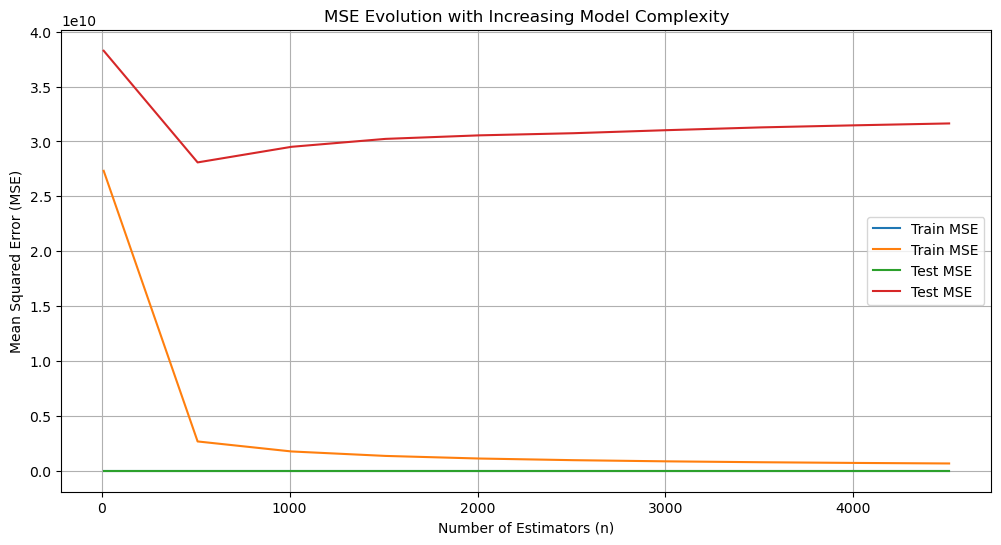

In [19]:
# Plotting the MSE evolution
plt.figure(figsize=(12, 6))
plt.plot(range(10, 5001, 500), train_mse_list, label='Train MSE')
plt.plot(range(10, 5001, 500), test_mse_list, label='Test MSE')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Evolution with Increasing Model Complexity')
plt.legend()
plt.grid()
plt.show() 

### Task 8 : What can you observe ?

1. Training MSE Trend:
As the number of estimators (n) in the model increases, the training MSE (Mean Squared Error) generally decreases. This means the model is getting better at fitting the training data.
If the training MSE becomes very low, it might indicate the model is overfitting, meaning it's too closely matching the training data, including any noise.

2. Testing MSE Trend:
Initially, as n increases, the testing MSE decreases, showing the model is improving its predictions on new data.
After a certain point, the testing MSE starts to increase, suggesting the model is overfitting the training data and not generalizing well to new data.

3. Bias-Variance Trade-off:
Simpler models (fewer estimators) have higher bias (they miss patterns in the data) and lower variance.
More complex models (more estimators) have lower bias (they capture patterns in the data) but higher variance (they fit the training data too closely, including noise).

4. Model Performance:
Lower MSE values on the test set indicate better performance on new data.
Comparing training and testing MSE helps identify if the model is overfitting or underfitting. 

### Task 9 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

1. Create New Features:
Add new features that might help the model. For example, calculate the age of the car from the year column.

2. Handle Missing Values Better:
Instead of filling missing values with zero, use methods like the mean or median to fill them.

3. Scale Numerical Features:
Make sure all numerical features are on the same scale. Use methods like standardization or normalization.

4. Tune Hyperparameters:
Experiment with different settings for the Gradient Boosting Regressor to find the best ones. Use techniques like grid search to automate this.

5. Increase Model Complexity:
Try different settings for model complexity, like max_depth or min_samples_split.

6. Cross-Validation:
Use cross-validation to get a better estimate of how well the model will perform on new data.

7. Better Encoding for Categorical Variables:
Try different methods to convert categorical variables to numbers, like target encoding.

8. Remove Outliers:
Identify and remove data points that are very different from the rest, as they might be errors.

9. Combine Multiple Models:
Use ensemble methods like stacking or blending to combine the predictions of multiple models.

10. Select Important Features:
Use techniques to find and keep only the most important features for the model. This can make the model simpler and better.

By making these changes, you can help the model perform better on both the training data and new, unseen data. 